**Introduction**
         In today's world, where financial services are increasingly reliant on data-driven decision-making, precise credit card approval accurately is crucial.  Predicting creditworthiness helps banks mitigate risks avioding defaults and identifying customers who are more likely to pay off credit card debits.



In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
CC_raw = pd.read_csv('Credit_card.csv') # reading dataset
CC = CC_raw.copy()

In [ ]:
CL_raw = pd.read_csv('Credit_card_label.csv')
CL= CL_raw.copy()

In [ ]:
CC.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
CL.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [ ]:
CL.shape

(1548, 2)

In [ ]:
CC.shape

(1548, 18)

In [ ]:
CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
CC.describe(include = 'all')

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000


In [ ]:
CC.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')

Dealing with missing values

In [ ]:
CC.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [ ]:
Missing_I = CC.isnull().sum(axis = 1)
Missing_I = Missing_I[Missing_I > 1]
Missing_I

2       2
3       2
5       2
27      2
65      2
125     2
143     2
205     2
273     2
561     2
689     2
915     2
919     2
991     2
1199    2
1263    2
1285    2
dtype: int64

In [ ]:
# exploring all rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(CC)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,NaN,2
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3


<Axes: >

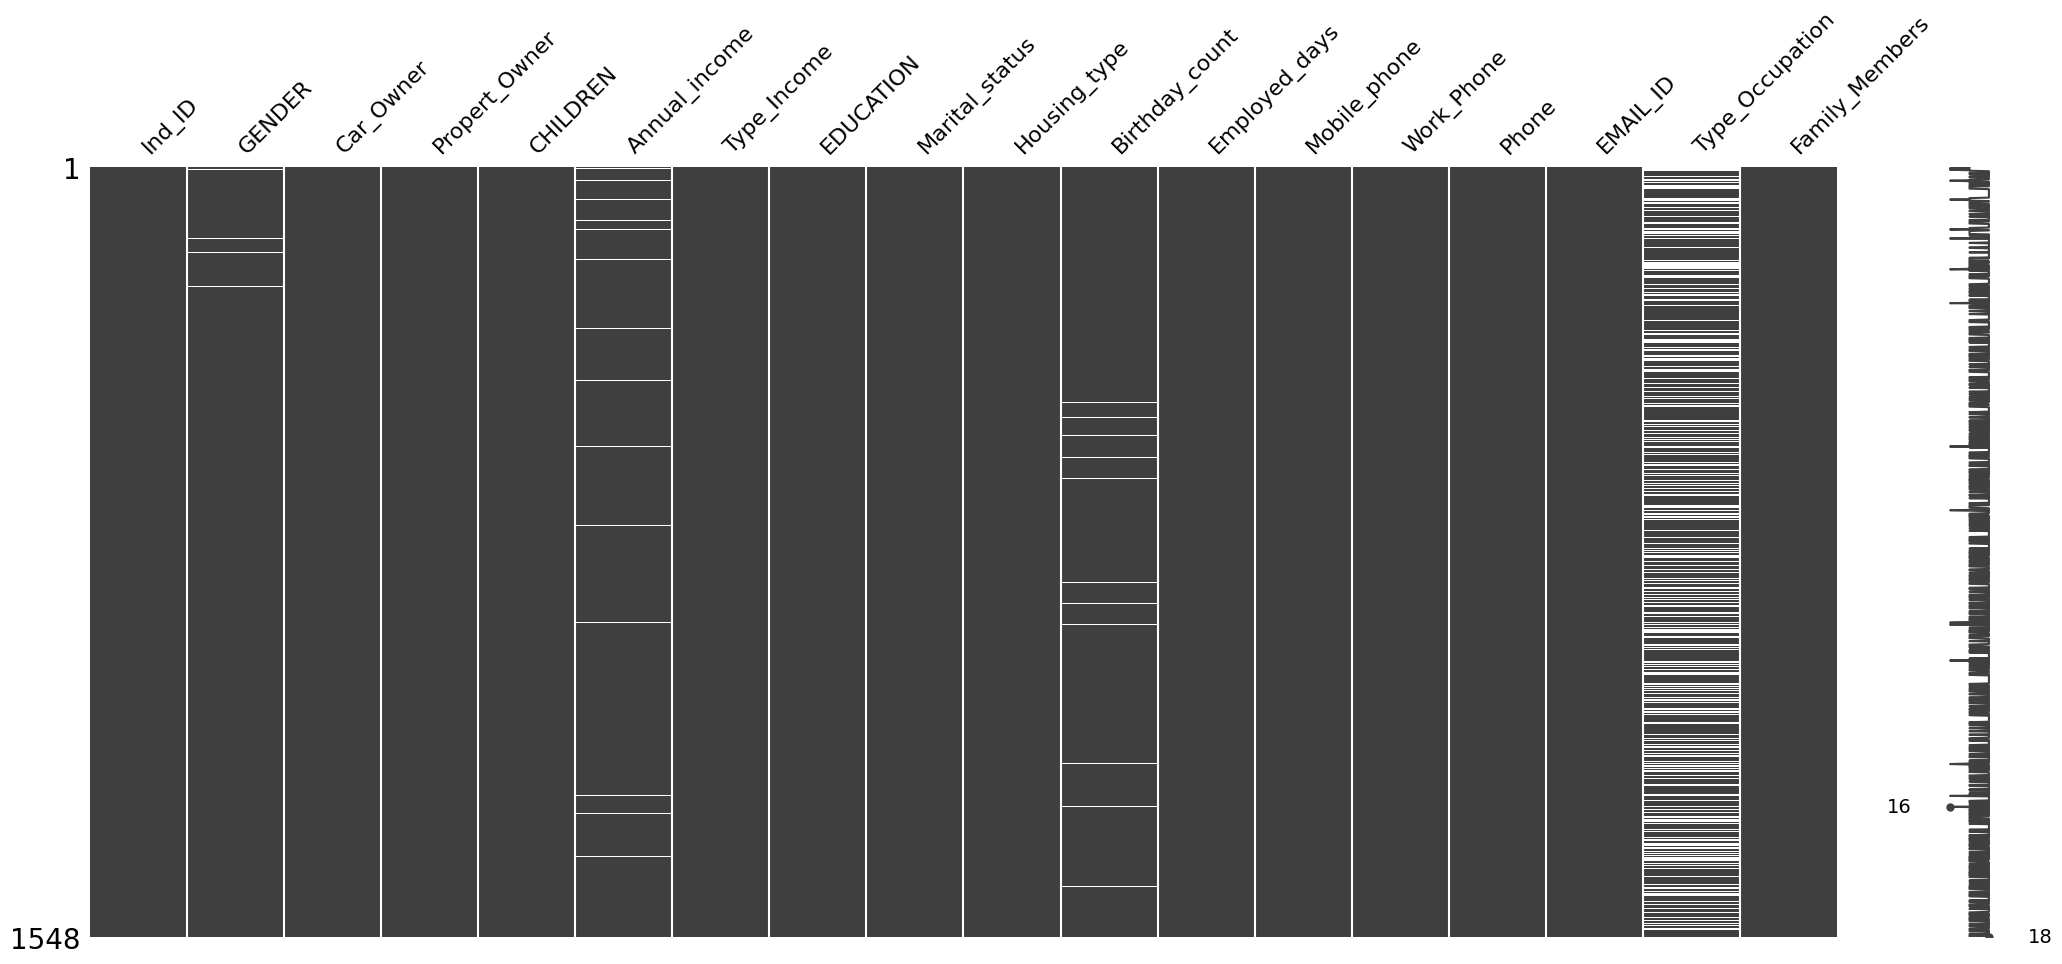

In [ ]:
# visualization of missing values
import missingno as msno
msno.matrix(CC)



1.   Abort form the show graph missing values are high Particularly Type_occupation column are many missing values
2.   Either we can remove them or replace with something like mean or median too.
3.   Label data(Int_id)






In [ ]:
# Dropping the 2 rows with null values for all variables
CC.drop(CC[CC['Birthday_count'].isnull()].index,axis=0, inplace=True)

In [ ]:
# Dropping the null values from target variable
CC.drop(CC[CC['Ind_ID'].isnull()].index,axis=0, inplace=True)

In [ ]:
CC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1526 non-null   int64  
 1   GENDER           1519 non-null   object 
 2   Car_Owner        1526 non-null   object 
 3   Propert_Owner    1526 non-null   object 
 4   CHILDREN         1526 non-null   int64  
 5   Annual_income    1503 non-null   float64
 6   Type_Income      1526 non-null   object 
 7   EDUCATION        1526 non-null   object 
 8   Marital_status   1526 non-null   object 
 9   Housing_type     1526 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1526 non-null   int64  
 12  Mobile_phone     1526 non-null   int64  
 13  Work_Phone       1526 non-null   int64  
 14  Phone            1526 non-null   int64  
 15  EMAIL_ID         1526 non-null   int64  
 16  Type_Occupation  1045 non-null   object 
 17  Family_Members

** Before dealing with missing values we have to encode all categorical data**

In [ ]:
# Ordinal encoding for Annual income, birthday_count and type occupation
# we can also use regular expression too
from sklearn.preprocessing import OrdinalEncoder
Or_enc = OrdinalEncoder()
CC[["Annual_income", "EDUCATION","Type_Occupation","Marital_status"]] = Or_enc.fit_transform(CC[["Annual_income", "EDUCATION","Type_Occupation","Marital_status"]])

In [ ]:
# label encoding for rest categorical variable
from sklearn.preprocessing import LabelEncoder

for col in ["GENDER","Car_Owner","Propert_Owner","Type_Income","Housing_type"]:
    CC[col] = LabelEncoder().fit_transform(CC[col])

In [ ]:
CC.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,1,1,1,0,60.0,1,1.0,1.0,1,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,0,1,0,0,88.0,0,1.0,1.0,1,-13557.0,-586,1,1,1,0,NaN,2
3,5009749,0,1,0,0,NaN,0,1.0,1.0,1,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,0,1,0,0,88.0,0,1.0,1.0,1,-13557.0,-586,1,1,1,0,NaN,2
5,5009753,2,1,0,0,88.0,1,1.0,1.0,1,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
# To avoid data leakage from outcom variable splitting the data set
Independent = CC.drop('Ind_ID',axis=1)
Independent.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,1,1,1,0,60.0,1,1.0,1.0,1,-18772.0,365243,1,0,0,0,NaN,2
1,0,1,0,0,88.0,0,1.0,1.0,1,-13557.0,-586,1,1,1,0,NaN,2
3,0,1,0,0,NaN,0,1.0,1.0,1,-13557.0,-586,1,1,1,0,NaN,2
4,0,1,0,0,88.0,0,1.0,1.0,1,-13557.0,-586,1,1,1,0,NaN,2
5,2,1,0,0,88.0,1,1.0,1.0,1,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
Dependent = CC['Ind_ID'] # creating Y variable only
Dependent.head()

0    5008827
1    5009744
3    5009749
4    5009752
5    5009753
Name: Ind_ID, dtype: int64

In [ ]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.5 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=624dea0f58205f61cfb2d39671c1b949048d52242c63467be8b0690902d727f2
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11334 sha256=2d36ca92b9d3d5ddb20cfb1d976c7e36e2f2f0a987ea372ef738c71e639db216
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
# Imputation using KNN
from fancyimpute import KNN
knn_imputer = KNN()
Independent_knn = Independent.copy(deep=True)
Independent_knn.iloc[:, :] = knn_imputer.fit_transform(Independent_knn)

Imputing row 1/1526 with 1 missing, elapsed time: 0.442
Imputing row 101/1526 with 0 missing, elapsed time: 0.444
Imputing row 201/1526 with 1 missing, elapsed time: 0.445
Imputing row 301/1526 with 0 missing, elapsed time: 0.447
Imputing row 401/1526 with 0 missing, elapsed time: 0.448
Imputing row 501/1526 with 0 missing, elapsed time: 0.450
Imputing row 601/1526 with 1 missing, elapsed time: 0.451
Imputing row 701/1526 with 0 missing, elapsed time: 0.453
Imputing row 801/1526 with 0 missing, elapsed time: 0.457
Imputing row 901/1526 with 1 missing, elapsed time: 0.459
Imputing row 1001/1526 with 1 missing, elapsed time: 0.462
Imputing row 1101/1526 with 0 missing, elapsed time: 0.464
Imputing row 1201/1526 with 0 missing, elapsed time: 0.466
Imputing row 1301/1526 with 1 missing, elapsed time: 0.468
Imputing row 1401/1526 with 0 missing, elapsed time: 0.470
Imputing row 1501/1526 with 0 missing, elapsed time: 0.471


<ipython-input-23-aa1f3837e261>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Independent_knn.iloc[:, :] = knn_imputer.fit_transform(Independent_knn)


In [ ]:
# Imputation using MICE
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
Independent_MICE = Independent.copy(deep=True)
Independent_MICE.iloc[:, :] = MICE_imputer.fit_transform(Independent_MICE)

<ipython-input-24-207ab105cd50>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Independent_MICE.iloc[:, :] = MICE_imputer.fit_transform(Independent_MICE)


<Axes: xlabel='Annual_income', ylabel='Count'>

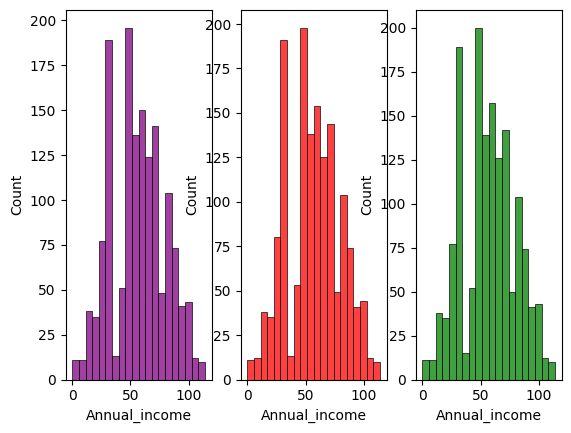

In [ ]:
fig, ax =plt.subplots(1,3)
sns.histplot(CC['Annual_income'],bins=20, color="purple", ax=ax[0])
sns.histplot(Independent_knn['Annual_income'], color="red", bins=20, ax=ax[1])
sns.histplot(Independent_MICE['Annual_income'], color="green", bins=20, ax=ax[2])

<Axes: >

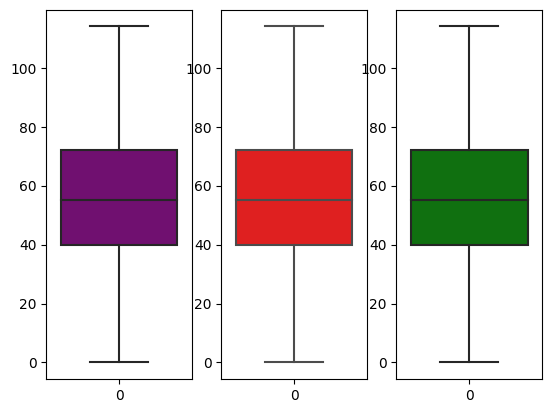

In [ ]:
fig, ax =plt.subplots(1,3)
sns.boxplot(CC['Annual_income'], color="purple", ax=ax[0])
sns.boxplot(Independent_knn['Annual_income'], color="red", ax=ax[1])
sns.boxplot(Independent_MICE['Annual_income'], color="green", ax=ax[2])

In [ ]:
Independent_knn.describe() # using describe function to see if there is any discrepency in numerical measures

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
count,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.0,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000
mean,0.374836,0.402359,0.653997,0.413499,56.413177,1.865007,3.065531,1.438401,1.293578,-16040.342071,59292.488860,1.0,0.206422,0.307339,0.093709,7.127895,2.160550
std,0.493627,0.490534,0.475850,0.777589,23.092036,1.272197,1.349547,0.984373,0.968513,4229.503202,137747.625458,0.0,0.404870,0.461543,0.291519,3.730822,0.949086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,40.000000,1.000000,1.000000,1.000000,1.000000,-19553.000000,-3191.000000,1.0,0.000000,0.000000,0.000000,4.400103,2.000000
50%,0.000000,0.000000,1.000000,0.000000,55.000000,3.000000,4.000000,1.000000,1.000000,-15661.500000,-1569.000000,1.0,0.000000,0.000000,0.000000,7.349277,2.000000
75%,1.000000,1.000000,1.000000,1.000000,72.000000,3.000000,4.000000,2.000000,1.000000,-12417.000000,-431.000000,1.0,0.000000,1.000000,0.000000,10.000000,3.000000
max,2.000000,1.000000,1.000000,14.000000,114.000000,3.000000,4.000000,4.000000,5.000000,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,17.000000,15.000000


In [ ]:
Independent_MICE.describe() # using describe function to see if there is any discrepency in numerical measures

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
count,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.0,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000
mean,0.374836,0.402359,0.653997,0.413499,56.486419,1.865007,3.065531,1.438401,1.293578,-16040.342071,59292.488860,1.0,0.206422,0.307339,0.093709,13.648727,2.160550
std,0.493627,0.490534,0.475850,0.777589,22.974695,1.272197,1.349547,0.984373,0.968513,4229.503202,137747.625458,0.0,0.404870,0.461543,0.291519,13.953489,0.949086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,40.000000,1.000000,1.000000,1.000000,1.000000,-19553.000000,-3191.000000,1.0,0.000000,0.000000,0.000000,6.000000,2.000000
50%,0.000000,0.000000,1.000000,0.000000,55.000000,3.000000,4.000000,1.000000,1.000000,-15661.500000,-1569.000000,1.0,0.000000,0.000000,0.000000,8.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,72.000000,3.000000,4.000000,2.000000,1.000000,-12417.000000,-431.000000,1.0,0.000000,1.000000,0.000000,14.000000,3.000000
max,2.000000,1.000000,1.000000,14.000000,114.000000,3.000000,4.000000,4.000000,5.000000,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,43.711888,15.000000


1) From overall exploration it seems that MICE and KNN both performed well

2) Hence, I will go ahead with KNN imputation

In [ ]:
CC_miss = pd.concat([Independent_knn, Dependent], axis=1) # concatenating independent and dependent variable
CC_miss.head(10)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Ind_ID
0,1.0,1.0,1.0,0.0,60.0,1.0,1.0,1.0,1.0,-18772.0,365243.0,1.0,0.0,0.0,0.0,6.799880,2.0,5008827
1,0.0,1.0,0.0,0.0,88.0,0.0,1.0,1.0,1.0,-13557.0,-586.0,1.0,1.0,1.0,0.0,7.353294,2.0,5009744
3,0.0,1.0,0.0,0.0,88.0,0.0,1.0,1.0,1.0,-13557.0,-586.0,1.0,1.0,1.0,0.0,7.359599,2.0,5009749
4,0.0,1.0,0.0,0.0,88.0,0.0,1.0,1.0,1.0,-13557.0,-586.0,1.0,1.0,1.0,0.0,7.353294,2.0,5009752
5,2.0,1.0,0.0,0.0,88.0,1.0,1.0,1.0,1.0,-13557.0,-586.0,1.0,1.0,1.0,0.0,7.353358,2.0,5009753
6,0.0,1.0,0.0,0.0,88.0,0.0,1.0,1.0,1.0,-13557.0,-586.0,1.0,1.0,1.0,0.0,7.353294,2.0,5009754
7,0.0,0.0,0.0,0.0,60.0,1.0,4.0,1.0,1.0,-22134.0,365243.0,1.0,0.0,0.0,0.0,5.199977,2.0,5009894
8,1.0,1.0,1.0,1.0,102.0,0.0,4.0,1.0,1.0,-18173.0,-678.0,1.0,0.0,1.0,1.0,3.000000,3.0,5010864
9,1.0,1.0,1.0,1.0,102.0,1.0,4.0,1.0,1.0,-18173.0,-678.0,1.0,0.0,1.0,1.0,3.000000,3.0,5010868
10,1.0,1.0,1.0,1.0,102.0,0.0,4.0,3.0,1.0,-18173.0,-678.0,1.0,0.0,1.0,1.0,3.000000,1.0,5010869


Dealing with outliers

In [ ]:
# Here I am using IQR to remove outliers. I have already checked Z score and did not work well
# IQR for price column
Q1 = CC_miss['Ind_ID'].quantile(0.25)
Q3 = CC_miss['Ind_ID'].quantile(0.75)
print(Q3, Q1)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

5115677.0 5045080.75
70596.25
5221571.375
4939186.375


In [ ]:
CC_miss_out = CC_miss[CC.Ind_ID < upper_bound]
CC_miss_out = CC_miss_out[CC.Ind_ID > lower_bound]
CC_miss_out.shape

(1526, 18)

<Axes: xlabel='Ind_ID', ylabel='Count'>

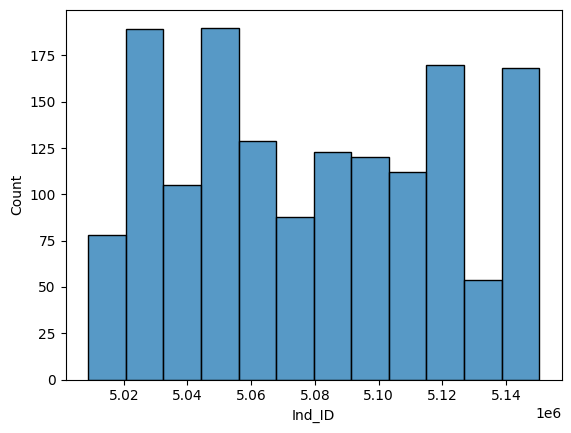

In [ ]:
sns.histplot(CC_miss_out['Ind_ID'])

In [ ]:
# Here I am using IQR to remove outliers. I have already checked Z score and did not work well
# IQR for id column
Q1 = CC_miss_out['Annual_income'].quantile(0.25)
Q3 = CC_miss_out['Annual_income'].quantile(0.75)
print(Q3, Q1)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

72.0 40.0
32.0
120.0
-8.0


In [ ]:
CC_miss_out = CC_miss_out[CC_miss.Annual_income < upper_bound]
CC_miss_out = CC_miss_out[CC_miss.Annual_income > lower_bound]
CC_miss_out.shape

(1526, 18)

<Axes: xlabel='Annual_income', ylabel='Count'>

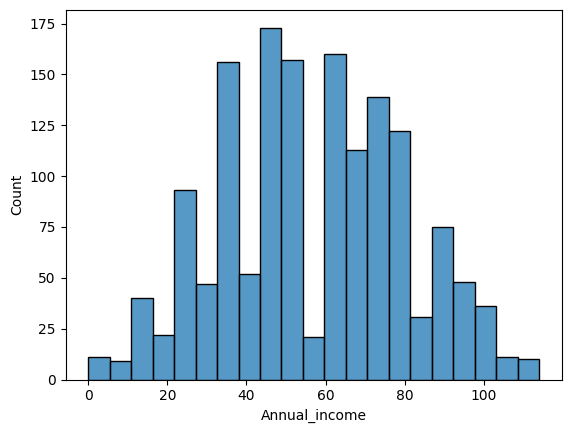

In [ ]:
sns.histplot(CC_miss_out['Annual_income']) # examining distribution of area column



*   Even the remove the outliers Ind_id and Annual_income are the skewed
*   For linear regression, errors should be normally distributed.



In [ ]:
# scatter plot between ind_id and annual income
sns.scatterplot(CC_miss_out.Ind_ID, CC_miss_out.Annual_income)

TypeError: ignored

In [ ]:
data = pd.DataFrame(CC_miss_out) # checking correlation only between price and area
print(data.corr(method = 'spearman'))

                   GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
GENDER           1.000000   0.369971      -0.042811  0.064203       0.279743   
Car_Owner        0.369971   1.000000      -0.001557  0.070376       0.237942   
Propert_Owner   -0.042811  -0.001557       1.000000 -0.021273       0.018885   
CHILDREN         0.064203   0.070376      -0.021273  1.000000       0.068019   
Annual_income    0.279743   0.237942       0.018885  0.068019       1.000000   
Type_Income      0.060366   0.034046      -0.053829  0.061504      -0.102404   
EDUCATION       -0.044963  -0.125711      -0.021958 -0.088861      -0.237939   
Marital_status  -0.105240  -0.126688       0.000991 -0.185723      -0.007395   
Housing_type     0.078686  -0.012456      -0.200451 -0.005734       0.001160   
Birthday_count   0.184440   0.140905      -0.121563  0.337626       0.114759   
Employed_days   -0.047005  -0.048264       0.063379 -0.163356      -0.176755   
Mobile_phone          NaN        NaN    

In [ ]:
CC_miss_out.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Ind_ID
0,1.0,1.0,1.0,0.0,60.0,1.0,1.0,1.0,1.0,-18772.0,365243.0,1.0,0.0,0.0,0.0,6.799880,2.0,5008827
1,0.0,1.0,0.0,0.0,88.0,0.0,1.0,1.0,1.0,-13557.0,-586.0,1.0,1.0,1.0,0.0,7.353294,2.0,5009744
3,0.0,1.0,0.0,0.0,88.0,0.0,1.0,1.0,1.0,-13557.0,-586.0,1.0,1.0,1.0,0.0,7.359599,2.0,5009749
4,0.0,1.0,0.0,0.0,88.0,0.0,1.0,1.0,1.0,-13557.0,-586.0,1.0,1.0,1.0,0.0,7.353294,2.0,5009752
5,2.0,1.0,0.0,0.0,88.0,1.0,1.0,1.0,1.0,-13557.0,-586.0,1.0,1.0,1.0,0.0,7.353358,2.0,5009753


In [ ]:
# Examine multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X_vif = CC_miss_out.drop(['Ind_ID'], axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]

print(vif_data)

            feature         VIF
0            GENDER    1.264892
1         Car_Owner    1.227664
2     Propert_Owner    1.075986
3          CHILDREN   15.798069
4     Annual_income    1.276003
5       Type_Income    1.173325
6         EDUCATION    1.129079
7    Marital_status    4.588301
8      Housing_type    1.089163
9    Birthday_count    1.863962
10    Employed_days    1.977951
11     Mobile_phone  179.965178
12       Work_Phone    1.269209
13            Phone    1.161497
14         EMAIL_ID    1.068492
15  Type_Occupation    1.071499
16   Family_Members   21.342434




*   It seems that Children, mobile_phone, Family_members are highly correlated




In [ ]:
X_vif = CC_miss_out.drop(['Ind_ID', 'CHILDREN', 'Mobile_phone', 'Family_Members'], axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]

print(vif_data)

            feature        VIF
0            GENDER   1.989974
1         Car_Owner   2.008372
2     Propert_Owner   2.990002
3     Annual_income   7.601445
4       Type_Income   3.451743
5         EDUCATION   6.394536
6    Marital_status   3.207796
7      Housing_type   2.657013
8    Birthday_count  16.798639
9     Employed_days   2.299196
10       Work_Phone   1.552543
11            Phone   1.673059
12         EMAIL_ID   1.156914
13  Type_Occupation   4.447087






*   after removing children, mobile phone and family members correlation values look better now





In [ ]:
# Linear regression
X_lin = CC_miss_out.drop(['Ind_ID', 'Annual_income', 'Marital_status', 'Type_Income'], axis=1)
y_lin = CC_miss_out['Ind_ID']

In [ ]:
X_lin.shape

(1526, 14)

In [ ]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=0.25, random_state=101)

In [ ]:
# performing transformation of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.7464363 , -0.82454989, -1.36644353, ..., -0.30949223,
         0.22870111, -0.17447568],
       [-0.7464363 , -0.82454989, -1.36644353, ..., -0.30949223,
        -0.52256351, -1.18255741],
       [ 1.28188467,  1.21278289,  0.7318268 , ..., -0.30949223,
         0.46677037, -1.18255741],
       ...,
       [-0.7464363 , -0.82454989,  0.7318268 , ..., -0.30949223,
        -0.73717402, -0.17447568],
       [-0.7464363 , -0.82454989, -1.36644353, ..., -0.30949223,
        -0.7371669 , -0.17447568],
       [-0.7464363 , -0.82454989,  0.7318268 , ...,  3.23109888,
         0.22870111, -0.17447568]])

In [ ]:
X_test=sc.transform(X_test)
X_test

array([[-0.7464363 , -0.82454989,  0.7318268 , ..., -0.30949223,
         1.8385419 , -1.18255741],
       [ 1.28188467, -0.82454989, -1.36644353, ..., -0.30949223,
         0.22870111, -0.17447568],
       [-0.7464363 , -0.82454989,  0.7318268 , ..., -0.30949223,
         2.1068487 ,  0.83360605],
       ...,
       [-0.7464363 , -0.82454989,  0.7318268 , ..., -0.30949223,
         0.14825685, -0.17447568],
       [-0.7464363 , -0.82454989, -1.36644353, ..., -0.30949223,
         0.76531471, -0.17447568],
       [ 1.28188467,  1.21278289, -1.36644353, ..., -0.30949223,
         0.73135045,  0.83360605]])

In [ ]:
# importing cost function libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
# fitting linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)
# regression coefficients
print('Coefficients: ', lm.coef_)

Coefficients:  [ 1.26391920e+03 -2.58915343e+03 -7.71527860e+02  5.26823369e+02
  2.31814276e+02  6.91922294e+02 -1.45988975e+03 -2.33436997e+03
 -1.36424205e-12  3.68189989e+03  2.17280995e+02 -1.26440129e+03
  2.11685810e+03  8.50478426e+02]


In [ ]:
# fitting model into test data
y_pred = lm.predict(X_train)

In [ ]:
# calculting rsquared value
r2 = r2_score(y_true=y_train,y_pred=y_pred)
print(r2)

0.021905897561388277


In [ ]:
# Checking mean value for residuala
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.864273335550215e-10




*   Mean value close to 0 hence we are good to go




TypeError: ignored

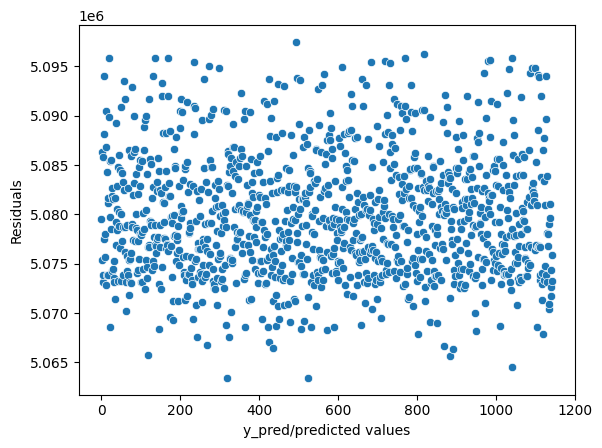

In [ ]:
# scatter plot between predicted value and error
p = sns.scatterplot(y_pred)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([2],[0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

<ipython-input-59-a75980fb573d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred),bins=50)


<Axes: xlabel='Ind_ID', ylabel='Density'>

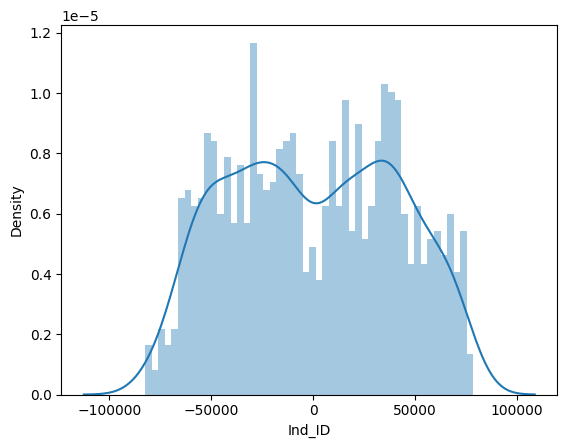

In [ ]:
# checking if errors are normally distributed are not
sns.distplot((y_train-y_pred),bins=50)

In [ ]:
predictions = lm.predict(X_test) # predicting test set

In [ ]:
y_test.head()

1316    5092349
972     5025161
1257    5010010
355     5010526
163     5146005
Name: Ind_ID, dtype: int64

In [ ]:
predictions

array([5083511.75717197, 5082884.1382825 , 5083726.90210118,
       5081500.62581117, 5070901.31159713, 5071840.90443258,
       5077462.02978919, 5077222.27017176, 5075497.14311836,
       5073645.83774096, 5078656.1682898 , 5077662.19061151,
       5072792.60964163, 5083957.31351367, 5071108.03250679,
       5075617.09021587, 5083023.72847247, 5073821.46556541,
       5077958.57288153, 5071187.30309451, 5070617.36552595,
       5076677.17710879, 5082762.84001853, 5073827.41754872,
       5070119.90995977, 5071338.44465603, 5077366.52977013,
       5072159.81241416, 5086874.83433357, 5068353.97315799,
       5068475.00719925, 5071979.37076343, 5081674.21551098,
       5081967.13575085, 5071805.31845796, 5073441.2667917 ,
       5070857.09478263, 5068579.8140276 , 5089679.38849161,
       5087316.19265866, 5084747.30981927, 5083729.03001745,
       5076985.85263329, 5079041.46076241, 5075771.95074783,
       5070855.26170242, 5081363.22423027, 5073504.69613912,
       5081341.63952929,

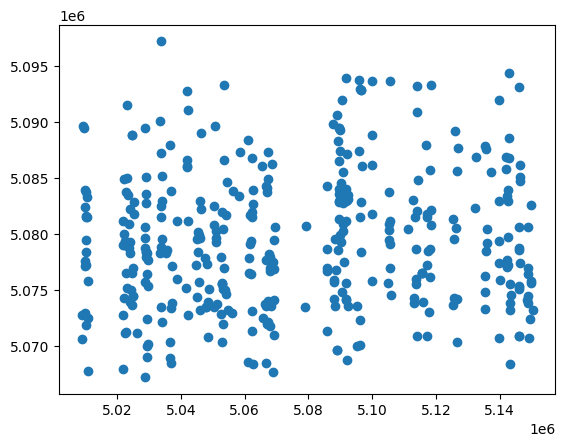

In [ ]:
# scatter plot between actaul and predicted value
plt.scatter(y_test,predictions)

In [ ]:
# Calculating error
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 36460.01824796715
MSE: 1806655976.7255993
RMSE: 42504.77592842479


**XGboost**

In [ ]:
# XGBoost
X = CC_miss_out.drop(['Ind_ID', 'Annual_income', 'Marital_status'], axis=1) # number of bedrooms and total stories are not good predictor
y = CC_miss_out['Ind_ID']

In [ ]:
import xgboost as xgb

In [ ]:
# we will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)  #For splitting the test data

In [ ]:
#We have to instantiate an XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments.
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
#Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[13:14:23] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# we have to #Compute the rmse by invoking the mean_sqaured_error function from sklearn's
#metrics module.
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1772197.523927


**Random forest regression**

In [ ]:
# Importing library
from sklearn.ensemble import RandomForestRegressor

 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
# performing prediction
y_pred = regressor.predict(X_test)
y_pred

array([5105697.435     , 5069774.62916667, 5061519.62533333,
       5068001.49      , 5090132.0425    , 5070348.27783333,
       5076176.08333333, 5113085.63      , 5091174.25833333,
       5115994.47666667, 5056620.4025    , 5079250.0725    ,
       5075344.02583333, 5072384.78916667, 5094406.25533333,
       5076753.00083333, 5099417.942     , 5075699.37333333,
       5081455.9205    , 5083571.44290476, 5088458.99709524,
       5084296.58666667, 5074966.14333333, 5057201.66233333,
       5072544.77666667, 5095848.63233333, 5064201.23607143,
       5050585.34083333, 5067218.9575    , 5098585.69516667,
       5061144.10333333, 5070098.81833333, 5040246.591     ,
       5110922.135     , 5061638.15895238, 5072402.465     ,
       5107190.0115    , 5053209.42416667, 5044168.36333333,
       5071642.85016667, 5056846.14333333, 5078530.84666667,
       5073428.38516667, 5090195.81490476, 5068718.00083333,
       5086281.27616667, 5087605.175     , 5085896.705     ,
       5047787.5       ,

In [ ]:
# calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 33569.60931194885
MSE: 1633090066.683659
RMSE: 40411.50908693783


**Support vector regression**

In [ ]:
# Importing SVR library and creating model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = regressor.predict(X_test) # prediciting y

In [ ]:
# Calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 36683.83037170548
MSE: 1713213588.828055
RMSE: 41390.98439066236


**Conclusion**

The proposed project aims to predict credit card approval using customer information. By employing advanced data analysis and machine learning techniques, the project seeks to enhance the accuracy of creditworthiness assessment, contributing to better risk management for banks and improved financial outcomes for customers. Through careful analysis, modeling, and interpretation, the project will provide valuable insights into the factors influencing credit card approval decisions